In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integ
from astropy.io import ascii
from scipy import interpolate
import scipy.stats as stats
from astropy.table import Table, Column
import readsnap as rs


plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 15
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 15


# Constants in CGS

G = 6.6726e-08
Ro = 6.96e10
Mo = 1.99e33
c = 2.9979e+10
day = 60*60*24

DistUnit = Ro
MassUnit = Mo
TimeUnit = np.sqrt(DistUnit**3/(G*MassUnit))
VelUnit = DistUnit/TimeUnit
AngMomUnit = DistUnit*VelUnit*MassUnit

SpinUnit = AngMomUnit*c/(G*Mo**2)



Tday = TimeUnit/(60*60*24)

#=====================================================
# Finds index of the element in an array 
# with the closest value to "value"

def find_nearest(array,value):
        idx = (np.abs(array-value)).argmin()
#     return array[idx]
        return idx

## data from snapshots and dynamics file

In [3]:
def snapdata(path,snap):
    data = rs.readsnap(path,snap,0)
    dataBH = rs.readsnap(path,snap,5,skip_bh = 1)
    dataSTAR = rs.readsnap(path,snap,4)
    
    return data,dataBH,dataSTAR

def Get_dynamics(filename):

    """Getting the data from the dynmaics file"""
    
    dyn = np.genfromtxt(filename)    
    
    colnames = ('t','Macc_bh','Engy_bh','PaccX_bh','PaccY_bh','PaccZ_bh','LaccX_bh','LaccY_bh' \
                ,'LaccZ_bh','M_gas','X_gas','Y_gas','Z_gas','PX_gas','PY_gas','PZ_gas' \
                ,'LX_gas','LY_gas','LZ_gas', 'M_star','X_star','Y_star','Z_star','PX_star' \
                ,'PY_star','PZ_star','LX_star','LY_star','LZ_star','M_bh','X_bh','Y_bh' \
                ,'Z_bh','PX_bh','PY_bh','PZ_bh','LX_bh','LY_bh','LZ_bh','Macc_star', 'Engy_star' \
                ,'PaccX_star','PaccY_star','PaccZ_star','LaccX_star','LaccY_star' \
                ,'LaccZ_star','LaccX_starCM','LaccY_starCM','LaccZ_starCM','LaccX_bhCM' \
                ,'LaccY_bhCM','LaccZ_bhCM','rp')
    
    print np.shape(dyn), len(colnames)
    dat = Table(dyn,names=colnames)
    

    return dat



In [11]:
from astropy.io import ascii

testReadFile = "../output/test2/dynamics.txt"
dataTable = Get_dynamics(testReadFile)


(995, 54) 54


In [12]:
dataTable.colnames

['t',
 'Macc_bh',
 'Engy_bh',
 'PaccX_bh',
 'PaccY_bh',
 'PaccZ_bh',
 'LaccX_bh',
 'LaccY_bh',
 'LaccZ_bh',
 'M_gas',
 'X_gas',
 'Y_gas',
 'Z_gas',
 'PX_gas',
 'PY_gas',
 'PZ_gas',
 'LX_gas',
 'LY_gas',
 'LZ_gas',
 'M_star',
 'X_star',
 'Y_star',
 'Z_star',
 'PX_star',
 'PY_star',
 'PZ_star',
 'LX_star',
 'LY_star',
 'LZ_star',
 'M_bh',
 'X_bh',
 'Y_bh',
 'Z_bh',
 'PX_bh',
 'PY_bh',
 'PZ_bh',
 'LX_bh',
 'LY_bh',
 'LZ_bh',
 'Macc_star',
 'Engy_star',
 'PaccX_star',
 'PaccY_star',
 'PaccZ_star',
 'LaccX_star',
 'LaccY_star',
 'LaccZ_star',
 'LaccX_starCM',
 'LaccY_starCM',
 'LaccZ_starCM',
 'LaccX_bhCM',
 'LaccY_bhCM',
 'LaccZ_bhCM',
 'rp']

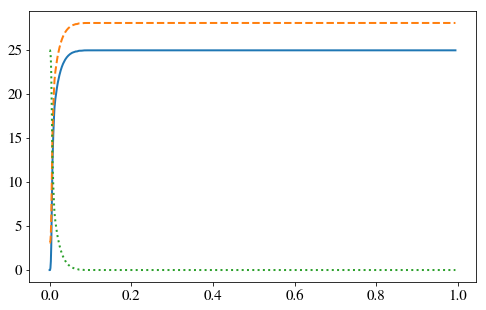

In [20]:
plt.plot(dataTable['t'],dataTable['Macc_bh'])
plt.plot(dataTable['t'],dataTable['M_bh'],'--')
plt.plot(dataTable['t'],dataTable['M_gas'],':')



In [14]:
# spin already accreted
def spin(dyn):
    Lacc = (np.sqrt(dyn['LaccZ_bh']**2))*AngMomUnit
    bh_spin = Lacc*c/(G*(dyn['M_bh']*Mo)**2)
    return bh_spin

In [15]:
spinBH = spin(dataTable)

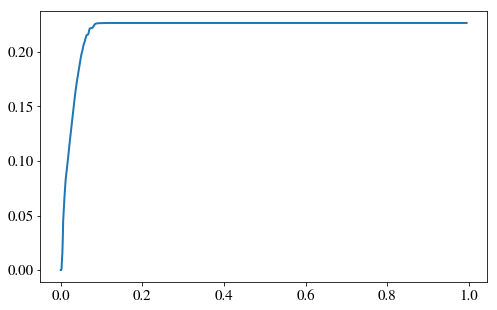

In [16]:
plt.plot(dataTable['t'],spinBH)